In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


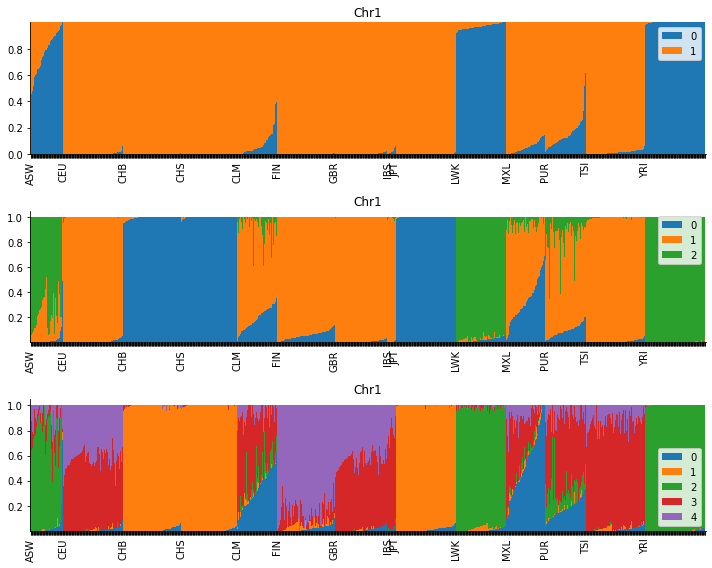

In [7]:
%pylab inline

sampleinfo = pd.read_csv("~/public/1000Genomes/igsr_samples.tsv", sep="\t")
sample_to_pop = dict(zip(list(sampleinfo["Sample name"]), list(sampleinfo["Population code"])))
samples = [line.split()[0] for line in open("/home/v1sathis/teams/group-4/project/admixture_out/admixture_chr1.pruned.fam", "r").readlines()]
pops = [sample_to_pop.get(item, "NA") for item in samples]

fig = plt.figure()
fig.set_size_inches((10, 8))

plotind = 1
for K in [2, 3, 5]:
    ax = fig.add_subplot(3, 1, plotind)
    
    data = pd.read_csv("/home/v1sathis/teams/group-4/project/admixture_out/admixture_chr1.pruned.%s.Q"%K, delim_whitespace=True, header=None)
    cols = list(data.columns)
    data["sample"] = samples
    data["pop"] = pops
    data = data.sort_values(["pop"]+cols)
    data.plot.bar(stacked=True, ax=ax, width=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Only plot label for first sample in each pop
    xticklabels = []
    currpop = ""
    for i in range(data.shape[0]):
        if data["pop"].values[i] == currpop:
            xticklabels.append("")
        else:
            xticklabels.append(data["pop"].values[i])
            currpop = data["pop"].values[i]
    ax.set_xticklabels(xticklabels)
    ax.set_title("Chr1")
    
    plotind += 1
fig.tight_layout()

Populating the interactive namespace from numpy and matplotlib


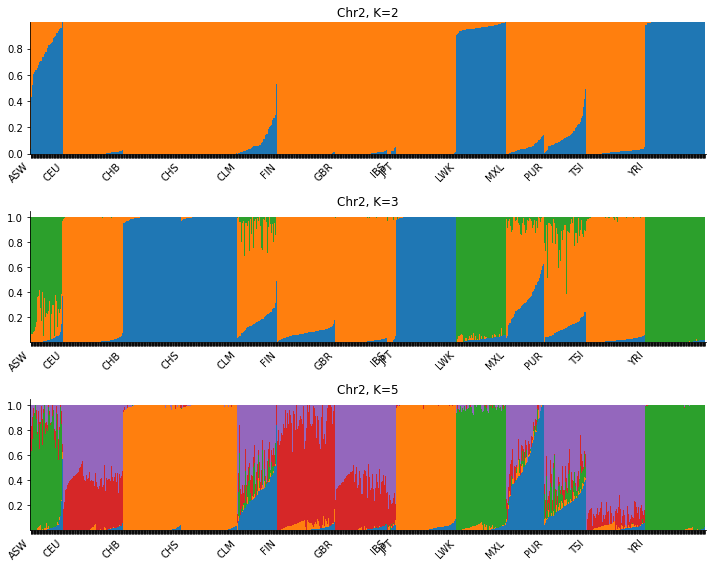

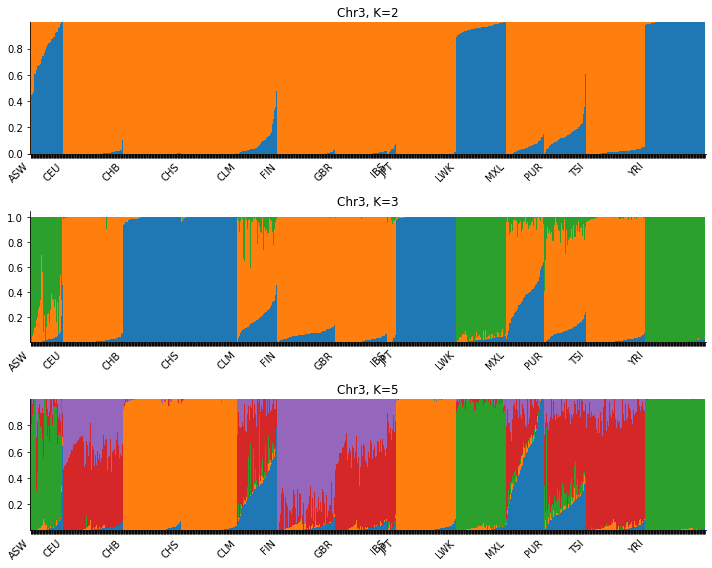

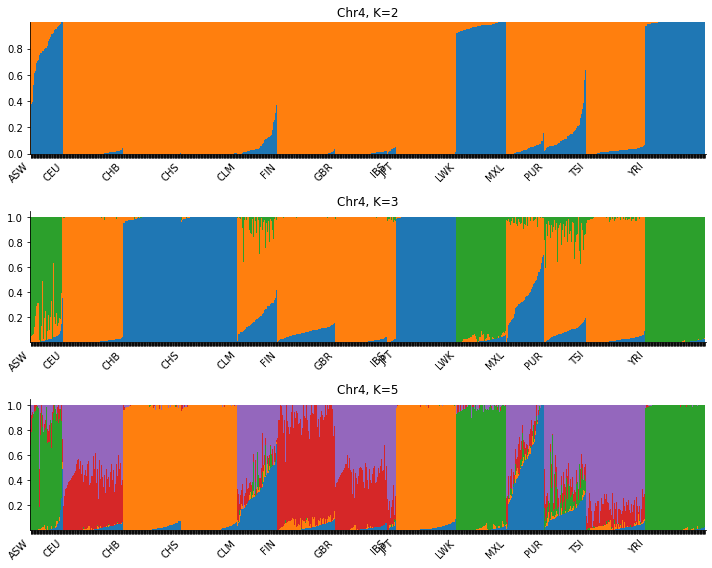

In [8]:
%pylab inline

# Load sample info
sampleinfo = pd.read_csv("~/public/1000Genomes/igsr_samples.tsv", sep="\t")
sample_to_pop = dict(zip(list(sampleinfo["Sample name"]), list(sampleinfo["Population code"])))
samples = [line.split()[0] for line in open("/home/v1sathis/teams/group-4/project/admixture_out/admixture_chr1.pruned.fam", "r").readlines()]
pops = [sample_to_pop.get(item, "NA") for item in samples]

# Define chromosomes to iterate over
chromosomes = [2, 3, 4]

for chrom in chromosomes:
    fig = plt.figure(figsize=(10, 8))
    
    plotind = 1
    for K in [2, 3, 5]:
        ax = fig.add_subplot(3, 1, plotind)
        
        # Update file path for data
        data_file = f"/home/v1sathis/teams/group-4/project/admixture_out/admixture_chr{chrom}.pruned.{K}.Q"
        data = pd.read_csv(data_file, delim_whitespace=True, header=None)
        cols = list(data.columns)
        data["sample"] = samples
        data["pop"] = pops
        data = data.sort_values(["pop"]+cols)
        
        data.plot.bar(stacked=True, ax=ax, width=1, legend=False) # Turn off legend for each subplot for clarity
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        # Only plot label for first sample in each pop
        xticklabels = []
        currpop = ""
        for i in range(data.shape[0]):
            if data["pop"].values[i] == currpop:
                xticklabels.append("")
            else:
                xticklabels.append(data["pop"].values[i])
                currpop = data["pop"].values[i]
        ax.set_xticklabels(xticklabels, rotation=45, ha='right')
        ax.set_title(f"Chr{chrom}, K={K}")
        
        plotind += 1

    fig.tight_layout()
    plt.show()
